# ❤️ Task 3: Heart Disease Prediction

**Objective:** Predict if a person is at risk of heart disease based on their medical and demographic data.

**Dataset Used:** Heart Disease Dataset from UCI (via Kaggle)

**Key Steps:**
- Clean the data
- Perform exploratory data analysis (EDA)
- Train a classification model (Logistic Regression / Decision Tree)
- Evaluate with accuracy, confusion matrix, and ROC curve
- Identify important features

In [2]:
# Uncomment if needed
# !pip install pandas numpy seaborn matplotlib scikit-learn

## ✅ Step 1: Import Required Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    ConfusionMatrixDisplay
)

## ✅ Step 2: Load the Heart Disease Dataset
You can download the dataset from Kaggle:
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

We'll load it assuming it's in your notebook directory.

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 8.56k/8.56k [00:00<00:00, 2.06MB/s]

Extracting files...
Path to dataset files: C:\Users\ghula\.cache\kagglehub\datasets\fedesoriano\heart-failure-prediction\versions\1


In [10]:
# Replace filename if you renamed it
df = pd.read_csv("heart.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## ✅ Step 3: Data Cleaning
Check for:
- Missing values
- Duplicate rows
- Irregular data types


In [13]:
print("Missing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

# Drop duplicates if needed
df = df.drop_duplicates()


Missing values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Duplicates: 0


## ✅ Step 4: Exploratory Data Analysis (EDA)

Let's explore:
- Distributions of features
- Correlation with target
- Class balance


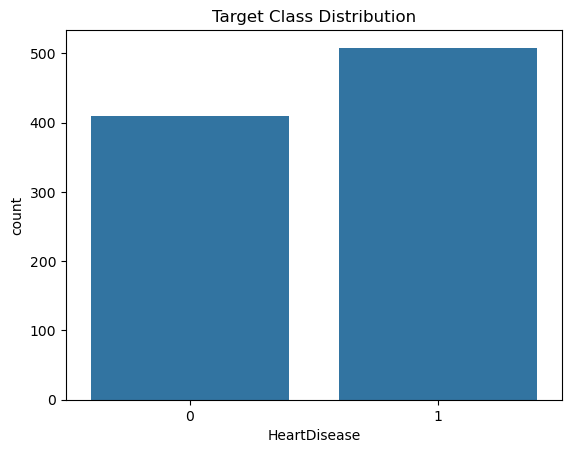

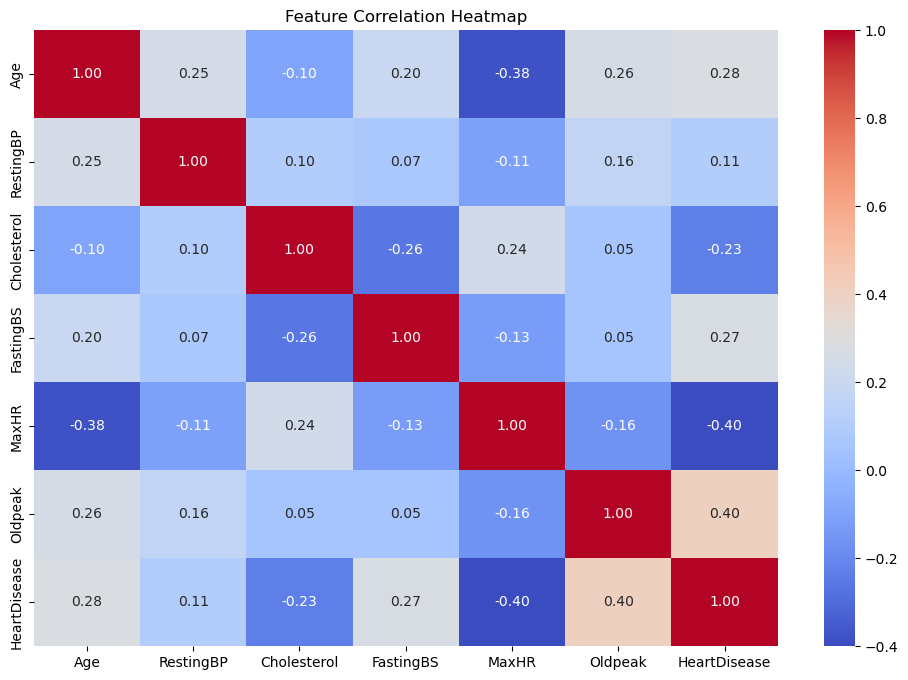

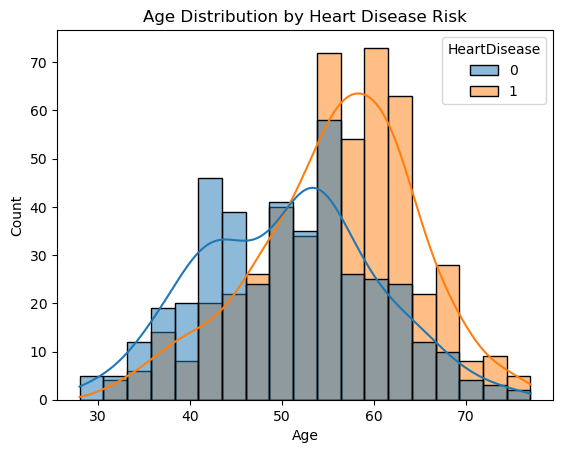

In [27]:
# Check class distribution
sns.countplot(x='HeartDisease', data=df)
plt.title("Target Class Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Example: age distribution by disease
sns.histplot(data=df, x='Age', hue='HeartDisease', kde=True)
plt.title("Age Distribution by Heart Disease Risk")
plt.show()


## ✅ Step 5: Define Features and Target
Split the dataset into:
- Features (X)
- Target (y = HeartDisease)


In [38]:
# One-hot encode all categorical columns
X = pd.get_dummies(df.drop('HeartDisease', axis=1), drop_first=True)
y = df['HeartDisease']

## ✅ Step 6: Train/Test Split
We'll use an 80/20 split to train and evaluate the model.


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## ✅ Step 7: Train Classification Models
We'll train:
1. Logistic Regression
2. Decision Tree Classifier


In [44]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)


## ✅ Step 8: Evaluate Models
We'll use:
- Accuracy
- Confusion Matrix
- ROC Curve + AUC


📊 Logistic Regression Accuracy: 0.8533


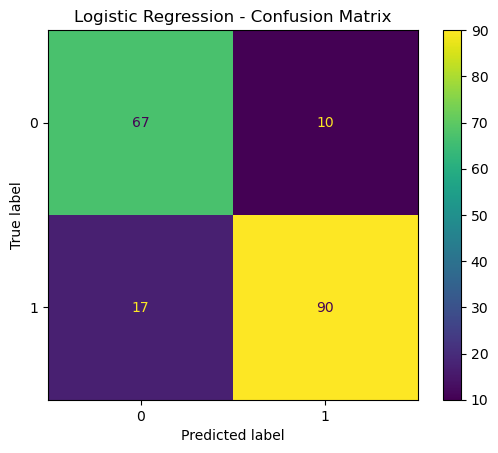

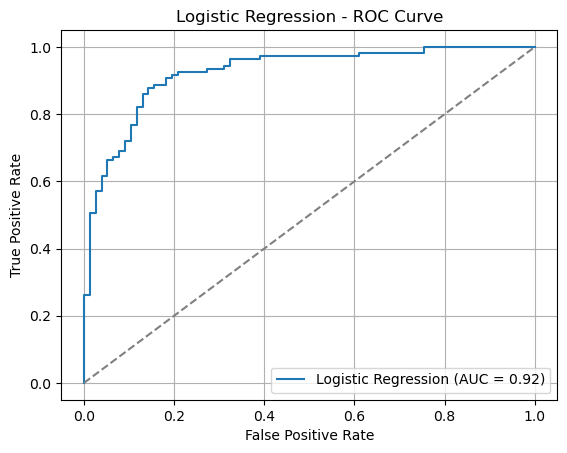

📊 Decision Tree Accuracy: 0.8641


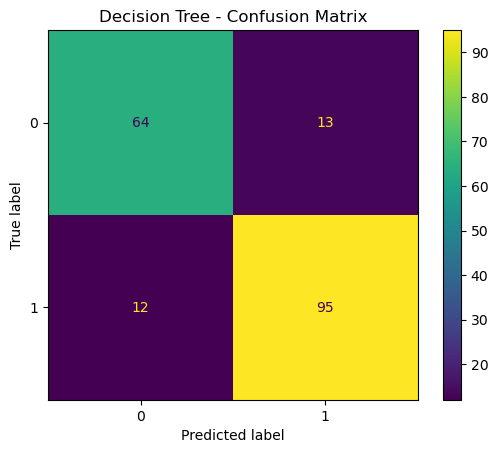

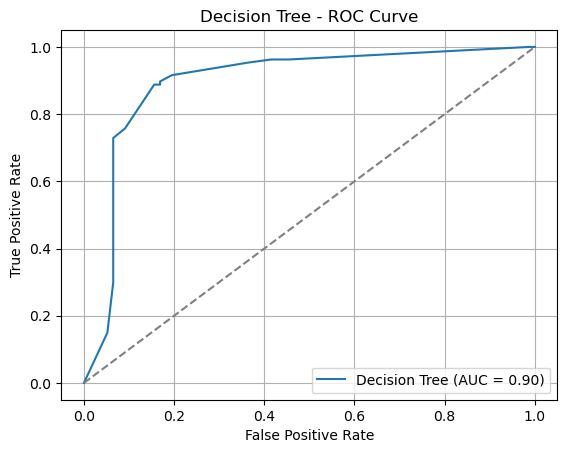

In [47]:
def evaluate_model(name, y_true, y_pred, y_proba):
    print(f"📊 {name} Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"{name} - Confusion Matrix")
    plt.show()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} - ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

# Logistic Regression Evaluation
evaluate_model("Logistic Regression", y_test, lr_preds, lr_model.predict_proba(X_test)[:, 1])

# Decision Tree Evaluation
evaluate_model("Decision Tree", y_test, dt_preds, dt_model.predict_proba(X_test)[:, 1])


## ✅ Step 9: Feature Importance
We'll examine which features are most influential in predicting heart disease.


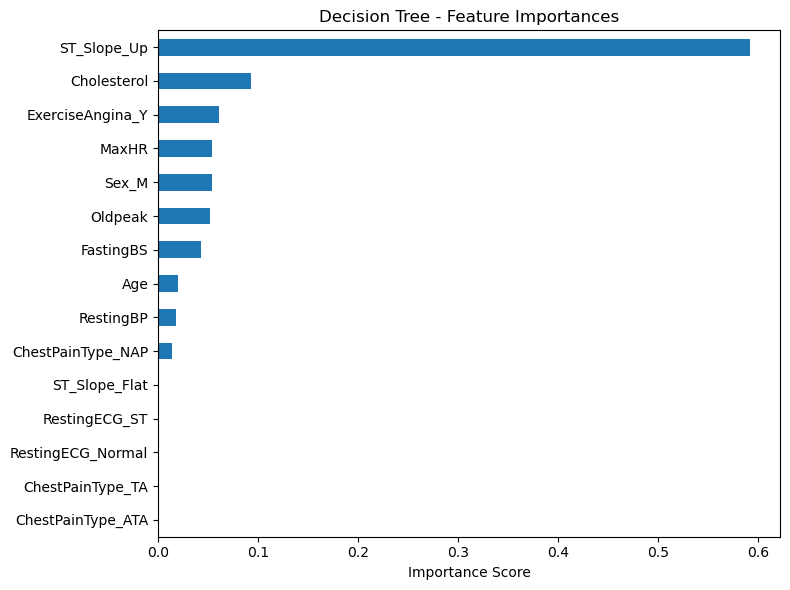

In [50]:
# Plot feature importances from Decision Tree
importances = pd.Series(dt_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title("Decision Tree - Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


## ✅ Summary

- We used the Heart Disease UCI dataset to build a binary classification model.
- Trained and evaluated:
  - **Logistic Regression** for interpretability
  - **Decision Tree** for non-linear splits and feature importance
- Evaluated with:
  - **Accuracy**
  - **Confusion Matrix**
  - **ROC Curve and AUC Score**
- Identified the most important medical features contributing to heart disease risk.

📌 This project builds practical skills in binary classification, healthcare data interpretation, and model evaluation.
